## Observations and Insights 

1. There is a strong positive correlation between mouse weight and average tumor volume (0.84) for mice treated with Capomulin. 
2. Capomulin and Ramicane had the lowest final tumor volumes. It may be interesting to see this as a change in volume to account for variations in initial tumor volume. 
3. For the Capomulin treated mouse (b128), the tumor volume was lowest after 35 days then slightly rebounded in volume. The researchers may want to investigate if this is a trend in all of their mice, which may change their future administration of the drug.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = mouse_df["Mouse ID"].nunique()
print(f"There are {num_mice} mice")

There are 249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])
mouse_df.loc[duplicates, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Showing again there is duplicated data
mouse_df.loc[mouse_df["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop only g989 (seen above as duplicate mouse)
clean_mouse_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice = clean_mouse_df["Mouse ID"].nunique()
print(f"There are {number_mice} mice")

There are 248 mice


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# create groupby object to sort by drug regiment
grouped_data = clean_mouse_df.groupby(by=["Drug Regimen"])
# put statistical measures into summary data frame
summary_df["Mean Tumor Volume"] = grouped_data["Tumor Volume (mm3)"].mean()
summary_df["Median Tumor Volume"] = grouped_data["Tumor Volume (mm3)"].median()
summary_df["Variance in Tumor Volume"] = grouped_data["Tumor Volume (mm3)"].var()
summary_df["Std Dev in Tumor Volume"] = grouped_data["Tumor Volume (mm3)"].std()
summary_df["SEM in Tumor Volume"] = grouped_data["Tumor Volume (mm3)"].sem()

summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Std Dev in Tumor Volume,SEM in Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_summary_df = pd.DataFrame()
# Using the aggregation method, produce the same summary statistics in a single line
# Use agg function on our grouped data to find stats for the Tumor Volume
agg_summary_df = grouped_data.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Check that this is the correct data for the graph

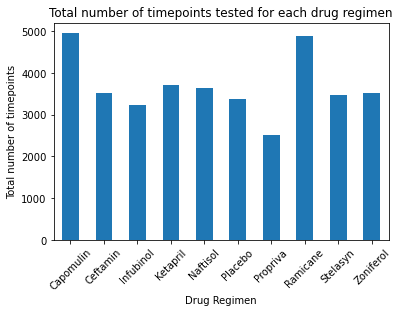

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Use groupby object to calculate total # of timepoints for each regimen
num_timepoints = grouped_data["Timepoint"].sum()
# create bar chart
bar = num_timepoints.plot(kind="bar")
# Format chart
bar.set_xticklabels(num_timepoints.index, rotation=45)
plt.ylabel("Total number of timepoints")
plt.xlabel("Drug Regimen")
plt.title("Total number of timepoints tested for each drug regimen")
plt.show()

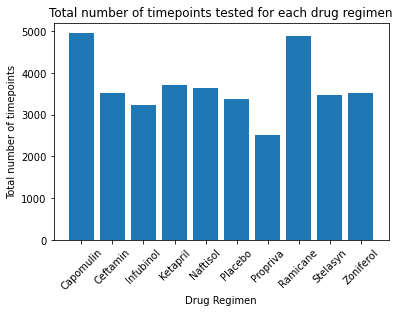

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(num_timepoints.index, num_timepoints)
# format chart
plt.xticks(num_timepoints.index, rotation=45)
plt.title("Total number of timepoints tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints")
plt.show()


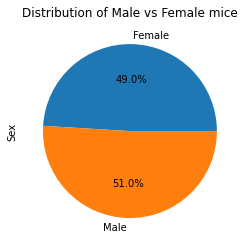

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# create sex group by object to count total number of each sex
sex_grouped = clean_mouse_df.groupby(by=["Sex"])
sex = sex_grouped["Sex"].count()
# create and format pie chart
pie = sex.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Male vs Female mice")
plt.show()

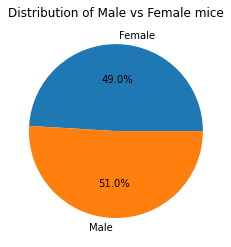

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create and format pie chart using sex groupby from above
plt.pie(sex, labels=sex.index, autopct="%1.1f%%")
plt.title("Distribution of Male vs Female mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create new df for each treatment
cap_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin", :]
ram_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol", :]
cef_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]

In [32]:
# Capomulin Merged Dataframe
# Start by getting the last (greatest) timepoint for each mouse
# group by mouse ID then get max timepoint
cap_grouped = cap_df.groupby(by="Mouse ID")
cap_tumor = cap_grouped["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# do a right merge so we only get data for the max timepoints (and only Capomulin mice)
cap_merged = pd.merge(clean_mouse_df, cap_tumor, on=("Mouse ID", "Timepoint"), how="right")
cap_merged.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2


In [33]:
# Ramicane Merged Dataframe
# group by mouse ID then get max timepoint
ram_grouped = ram_df.groupby(by="Mouse ID")
ram_tumor = ram_grouped["Timepoint"].max()

# do a right merge so we only get data for the max timepoints (and only Ramicane mice)
ram_merged = pd.merge(clean_mouse_df, ram_tumor, on=("Mouse ID", "Timepoint"), how="right")
ram_merged.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a411,Ramicane,Male,3,22,45,38.407618,1


In [34]:
# Infubinol Merged Dataframe
# group by mouse ID then get max timepoint
inf_grouped = inf_df.groupby(by="Mouse ID")
inf_tumor = inf_grouped["Timepoint"].max()

# do a right merge so we only get data for the max timepoints (and only Infubinol mice)
inf_merged = pd.merge(clean_mouse_df, inf_tumor, on=("Mouse ID", "Timepoint"), how="right")
inf_merged.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2


In [17]:
# Ceftamin Merged Dataframe
# group by mouse ID then get max timepoint
cef_grouped = cef_df.groupby(by="Mouse ID")
cef_tumor = cef_grouped["Timepoint"].max()

# do a right merge so we only get data for the max timepoints (and only Ceftamin mice)
cef_merged = pd.merge(clean_mouse_df, cef_tumor, on=("Mouse ID", "Timepoint"), how="right")
cef_merged.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3


In [36]:
# Capomulin IQR and Outliers
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Turn volume column into a list to be used for plotting
cap_volume = cap_merged["Tumor Volume (mm3)"]
# generate quartiles and iqr
cap_quartiles = cap_volume.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

print(f"The lower quartile of Capomulin tumors is: {cap_lowerq}")
print(f"The upper quartile of Capomulin tumors is: {cap_upperq}")
print(f"The median of Capomulin tumors is: {cap_quartiles[0.5]}")
print(f"The IQR of Capomulin tumors is: {cap_iqr}")

# calculate lower and upper bounds
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
    
# anything below lower_bound and above upper_bound are potential outliers
print(f"Values below {cap_lower_bound} could be outliers")
print(f"Values above {cap_upper_bound} could be outliers")

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The median of Capomulin tumors is: 38.1251644
The IQR of Capomulin tumors is: 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers


In [37]:
# Ramicane IQR and Outliers
# Turn volume column into a list to be used for plotting
ram_volume = ram_merged["Tumor Volume (mm3)"]
# generate quartiles and iqr
ram_quartiles = ram_volume.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

print(f"The lower quartile of Ramicane tumors is: {ram_lowerq}")
print(f"The upper quartile of Ramicane tumors is: {ram_upperq}")
print(f"The median of Ramicane tumors is: {ram_quartiles[0.5]}")
print(f"The IQR of Ramicane tumors is: {ram_iqr}")

# calculate lower and upper bounds
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
    
# anything below lower_bound and above upper_bound are potential outliers
print(f"Values below {ram_lower_bound} could be outliers")
print(f"Values above {ram_upper_bound} could be outliers")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The median of Ramicane tumors is: 36.56165229
The IQR of Ramicane tumors is: 9.098536719999998
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers


In [20]:
# Infubinol IQR and Outliers
# Turn volume column into a list to be used for plotting
inf_volume = inf_merged["Tumor Volume (mm3)"]
# generate quartiles and iqr
inf_quartiles = inf_volume.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print(f"The lower quartile of Infubinol tumors is: {inf_lowerq}")
print(f"The upper quartile of Infubinol tumors is: {inf_upperq}")
print(f"The median of Infubinol tumors is: {inf_quartiles[0.5]}")
print(f"The IQR of Infubinol tumors is: {inf_iqr}")

# calculate lower and upper bounds
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
    
# anything below lower_bound and above upper_bound are potential outliers
print(f"Values below {inf_lower_bound} could be outliers")
print(f"Values above {inf_upper_bound} could be outliers")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The median of Infubinol tumors is: 60.16518046
The IQR of Infubinol tumors is: 11.477135160000003
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers


In [38]:
# Ceftamin IQR and Outliers
# Turn volume column into a list to be used for plotting
cef_volume = cef_merged["Tumor Volume (mm3)"]
# generate quartiles and iqr
cef_quartiles = cef_volume.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

print(f"The lower quartile of Ceftamin tumors is: {cef_lowerq}")
print(f"The upper quartile of Ceftamin tumors is: {cef_upperq}")
print(f"The median of Ceftamin tumors is: {cef_quartiles[0.5]}")
print(f"The IQR of Ceftamin tumors is: {cef_iqr}")


# calculate lower and upper bounds
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
    
# anything below lower_bound and above upper_bound are potential outliers
print(f"Values below {cef_lower_bound} could be outliers")
print(f"Values above {cef_upper_bound} could be outliers")

The lower quartile of Ceftamin tumors is: 48.72207785
The upper quartile of Ceftamin tumors is: 64.29983003
The median of Ceftamin tumors is: 59.85195552
The IQR of Ceftamin tumors is: 15.577752179999997
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers


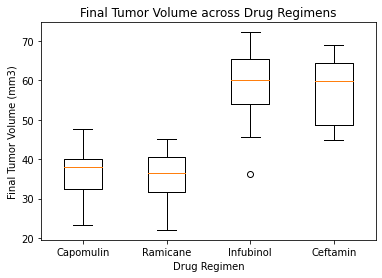

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# combine drug volumes into a single array so they can be plotted together
drug_volumes = [cap_volume, ram_volume, inf_volume, cef_volume]

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# generate plots using lists above
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume across Drug Regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(drug_volumes, labels=treatments)
plt.show()

## Line and Scatter Plots

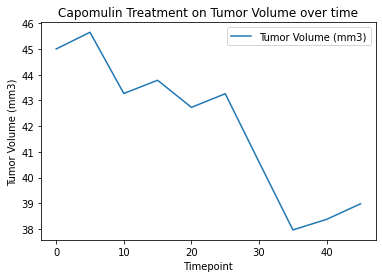

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Using mouse b128
indv_cap = cap_df.loc[cap_df["Mouse ID"] == "b128", :]
# Create line plot for this mouse
indv_cap.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")
# formatting
plt.title("Capomulin Treatment on Tumor Volume over time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

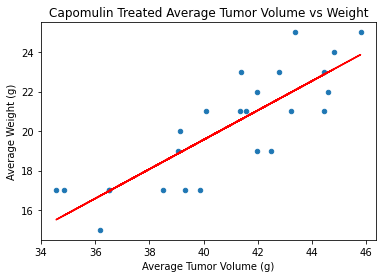

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Gather averages for each mouse to create scatter plot
avg_tumor_weight = cap_df.groupby(by=["Mouse ID"]).mean()
avg_tumor_weight.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)")
# Formatting
plt.ylabel("Average Weight (g)")
plt.xlabel("Average Tumor Volume (g)")
plt.title("Capomulin Treated Average Tumor Volume vs Weight")

# create lists for volume and weight that will be used for regression and correlation
tumor = avg_tumor_weight["Tumor Volume (mm3)"]
weight = avg_tumor_weight["Weight (g)"]

# Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor, weight)
# this is equation for our line
regress_values = tumor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot regression line on top of scatter
plt.plot(tumor,regress_values,"r-")
# add line equation to graph
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.show()

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(tumor,weight)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84
